In [1]:
#  simpleClassifier.py
#  G. Cowan / RHUL Physics / November 2021
#  Simple program to illustrate classification with scikit-learn

import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#  read the data in from files, 
#  assign target values 1 for signal, 0 for background
sigData = np.loadtxt('signal.txt')
nSig = sigData.shape[0]
sigTargets = np.ones(nSig)

bkgData = np.loadtxt('background.txt')
nBkg = bkgData.shape[0]
bkgTargets = np.zeros(nBkg)

# concatenate arrays into data X and targets y
X = np.concatenate((sigData,bkgData),0)
y = np.concatenate((sigTargets, bkgTargets))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [3]:
# Create classifier object and train
# Add code here to include other claassifiers (MLP, BDT,...)
clf = LDA()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [4]:
# Evaluate accuracy using the test data.
# If available, use the decision function, else (e.g. for MLP) use predict_proba
# Adjust threshold value tCut or pMin as appropriate

X_bkg_test = X_test[y_test==0]
X_sig_test = X_test[y_test==1]
y_bkg_test = y_test[y_test==0]
y_sig_test = y_test[y_test==1]
if hasattr(clf, "decision_function"):
    tCut = 0.
    y_bkg_pred = (clf.decision_function(X_bkg_test) >= tCut).astype(bool)
    y_sig_pred = (clf.decision_function(X_sig_test) >= tCut).astype(bool)
else:
    pCut = 0.5
    y_bkg_pred = (clf.predict_proba(X_bkg_test)[:,1]  >= pCut).astype(bool)
    y_sig_pred = (clf.predict_proba(X_sig_test)[:,1]  >= pCut).astype(bool)

power = metrics.accuracy_score(y_sig_test, y_sig_pred)        # = Prob(t >= tCut|sig)
print('power of test with respect to signal = ', power)

#  Add code here to obtain the background efficiency
# = size of test alpha = Prob(t >= tCut|bkg)

power of test with respect to signal =  0.7916666666666666


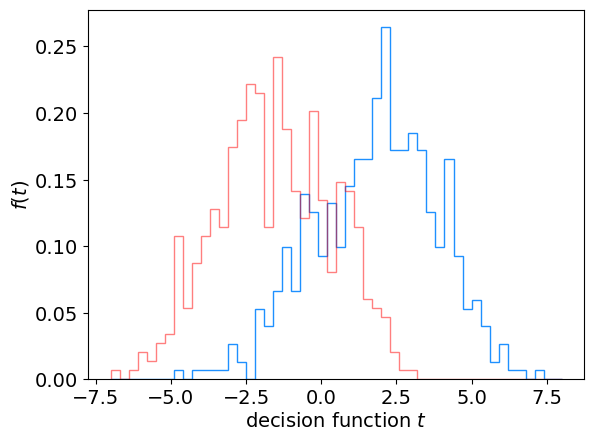

In [5]:
# make histogram of decision function
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(X_test)[:,1]
if hasattr(clf, "decision_function"):
    tTest = clf.decision_function(X_test)        # if available use decision_function
else:
    tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 50
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
plt.xlabel('decision function $t$', labelpad=3)
plt.ylabel('$f(t)$', labelpad=3)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color='dodgerblue')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False, color='red', alpha=0.5)
plt.savefig("decision_function_hist.pdf", format='pdf')

plt.show()